<a href="https://colab.research.google.com/github/eRuaro/Dog-Breed-Classifier/blob/main/dog_breed_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Dog Breed Classification with Tensorflow

This notebook builds a Dog Breed Classifier using Google Collab, Tensorflow, and Tensorflow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I see a cute dog, I want to know what breed it is.

## 2. Data

The data is gathered from Kaggle's dog breed identification competition which houses over 20,000 dog breed images.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

Testing is evaluated on Multi Class Log Loss between the predicted probability and the observed target.

For each image in the test set, predict a probability for each of the different breeds.

Example:
- What is the probability that this is a beagle?
- What is the probability that this is a labrador?

## 4. Features

Data information:
- Dealing with images (unstructured data)
- Due to image dataset, best to use deep learning / transfer learning
- There are 120 breeds of dogs in the dataset (120 different classes thus Multi Class Log Loss is used)
- Over 10,000 images each in both training, and test set.
- Test set images have no label as these are used for predicting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Setting up Our Data

In [2]:
!ls /content/drive/MyDrive/Tensorflow

dog_breed_classifier.ipynb  dog-breed-identification


In [3]:
#Unzipping a file in Colab
#!unzip "path-to-zip" -d "path-to-fodler-where-to-zip"

# Importing Tools

- Import Tensorflow ✅
- Import Tensorflow Hub ✅
- Use a GPU ✅

In [4]:
import tensorflow as tf
import tensorflow_hub as hub 

print("TF Version:", tf.__version__)
print("TF Hub Version:", hub.__version__)

print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF Version: 2.5.0
TF Hub Version: 0.12.0
GPU available


# Getting data ready

- Turn images into numerical format (tensors)
- Accessing data in google drive

In [5]:
# checkout labels of data
import pandas as pd

path = '/content/drive/MyDrive/Tensorflow/dog-breed-identification/labels.csv'
labels_csv = pd.read_csv(path)

print(labels_csv.describe())

print(labels_csv.head())

# id -> image file, breed -> dog breed of provided image

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     611a30b0211c0e907c7122c5850f8246  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


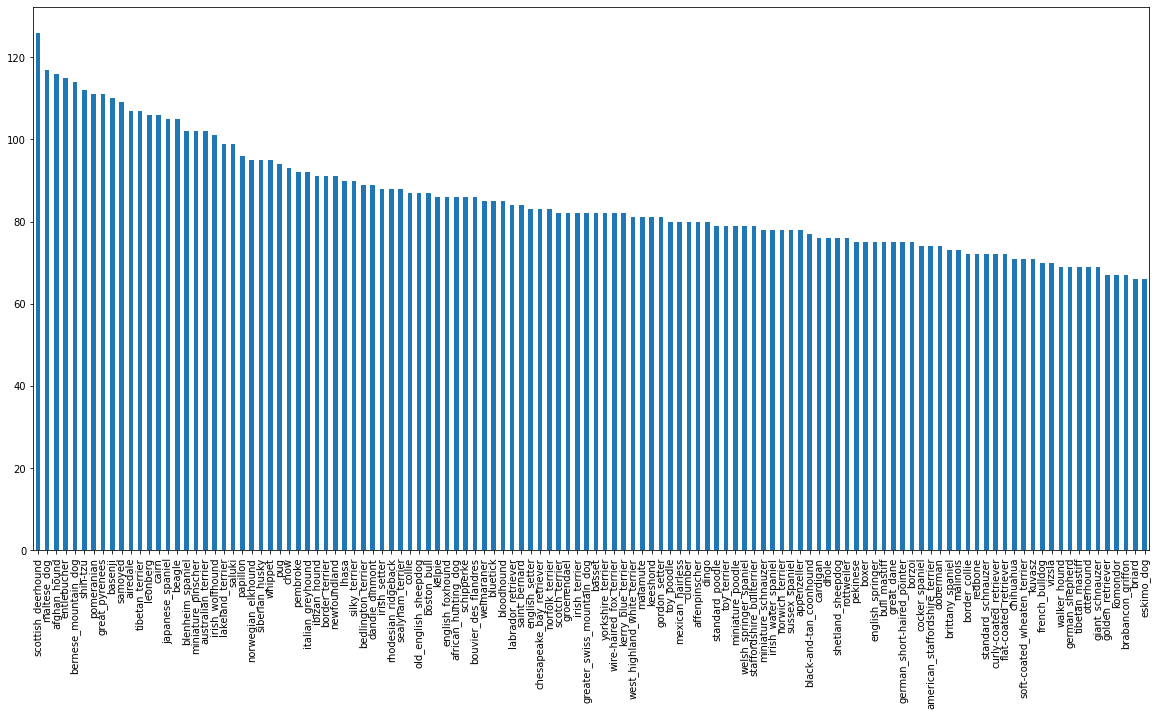

In [6]:
#visualizing how many images of each breed there are
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

## Preparing the Images

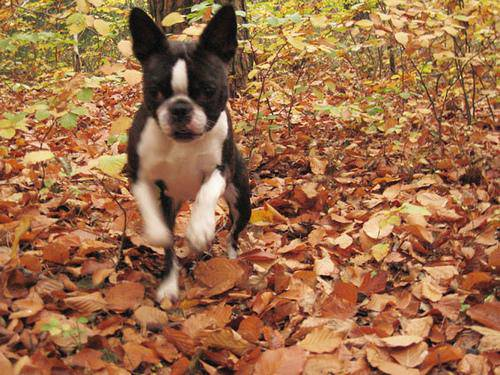

In [7]:
# Viewing an image using IPython
from IPython.display import Image

img_path = '/content/drive/MyDrive/Tensorflow/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg'
Image(img_path)

 ### Getting images and their labels

In [8]:
# Get file path of every file in the training dataset
filenames = ['drive/MyDrive/Tensorflow/dog-breed-identification/train/' + fname + '.jpg' for fname in labels_csv['id']]

filenames[:10]

['drive/MyDrive/Tensorflow/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Tensorflow/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Tensorflow/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Tensorflow/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Tensorflow/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Tensorflow/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Tensorflow/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Tensorflow/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Tensorflow/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Tensorflow/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

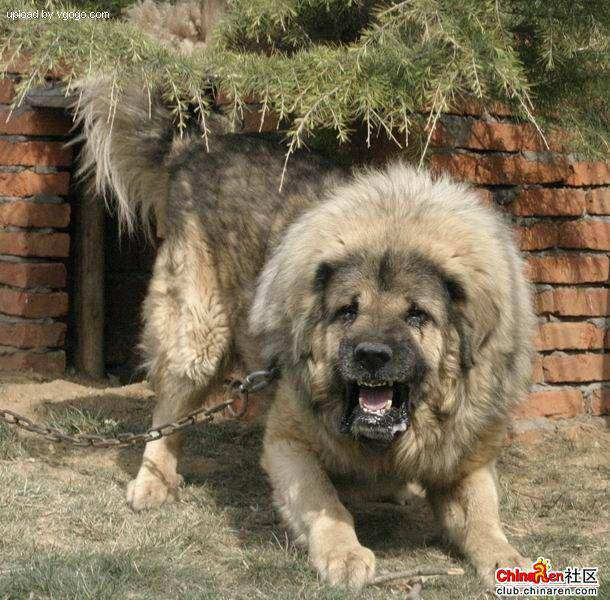

In [9]:
Image(filenames[9000])

In [10]:
labels_csv['breed'][9000]

'tibetan_mastiff'

### Turning data labels into numbers


In [11]:
import numpy as np

labels = labels_csv['breed'].to_numpy() # to numpy array

#see if number of labels matches the number of filenames
if (len(labels)) == len(filenames):
    print('Equal')
else:
    print('Not equal')


Equal


In [12]:
#find unique labels
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [13]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [14]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]

len(boolean_labels)

10222

In [15]:
# Convert boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0])) # index where label occures
print(boolean_labels[0].argmax()) # index where label occurs in boolean arrays
print(boolean_labels[0].astype(int)) # there will be a 1 (true) where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating a validation set

The dataset from kaggle doesn't contain a validation set, so I'll have to create my own.

In [16]:
#set up X (features) and y (target) variables
X = filenames
y = boolean_labels

I'm going to start experimenting with ~1000 images first and increase as needed

In [17]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param{type: "slider", min:1000, max:10000, step:1000}

In [18]:
#Split data into test and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X[:NUM_IMAGES],
    y[:NUM_IMAGES],
    test_size=0.2,
    random_state=42
)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

### Preprocessing images

- Finally converting images to numbers (tensors)
- Writing a function that:
    - Takes an image filepath as input
    - Use tensorflow to read the file and save it to a variable
    - Normalize our image (convert color channel values from 0 - 255 to 0 - 1
    - Turn 'image' (jpg) into tensors
    - Resize image into a standardized size (224, 224)
    - Return the modified image

In [19]:
# what does an image look like
# converting into numpy array
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [20]:
# turning into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [21]:
# Function that preprocesses image into tensors
# define image size
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and turns the image into a Tensor
    """

    #read an image file into a variable
    image = tf.io.read_file(image_path)

    #turn image into tensors
    image = tf.image.decode_jpeg(image, channels=3) #3 for Red Green Blue

    #convert color channel values from 0 - 255 to 0 - 1 values (decimals)
    image = tf.image.convert_image_dtype(image, tf.float32)

    #resize image to (224, 224)
    image = tf.image.resize(image, size=[img_size, img_size])

    #return the image
    return image

### Turning data into batches

- Tensorflow likes data to be in batches
- Tranform data into batches of size 32 (per Yann LeCun's tweet)
  - Processing images in groups of 32 (batch size)


In order to use tensorflow effectively, data must be in the form of tensor tuples `(image, label)`

In [22]:
#function that returns a tuple of tensors
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label, 
    and processes the image and returns a tuple of (image, label)
    """
    image = process_image(image_path)

    return image, label

In [23]:
#function to turn all of data into batches
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Create batches of data out of image (X) and label(y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no labels)
    """

    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(batch_size)

        return data_batch
    elif valid_data:
        #if data is a valid data set, no need to shuffle
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data.map(get_image_label).batch(batch_size)

        return data_batch
    else:
        print("Creating training data batches...")
        #turn filepaths and labels into tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        #shuffle pathnames and labels
        data = data.shuffle(buffer_size=len(X))
        #create (image, label) tuples, also turns image path into a preprocessed image
        data = data.map(get_image_label)

        data_batch = data.batch(batch_size)
        return data_batch

In [24]:
#creating training and validation batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [25]:
#check out attributes of data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing data batches

data in batches are hard to comprehend so it is best to visualize them

In [26]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch
    """
    plt.figure(figsize=(10,10))
    for i in range(25):
        #create subplots
        ax = plt.subplot(5, 5, i+1)
        #displays image
        plt.imshow(images[i])
        # add the image label as title
        plt.title(unique_breeds[labels[i].argmax()])

In [28]:
train_images, train_labels = next(train_data.as_numpy_iterator())

len(train_images), len(train_labels)

(32, 32)

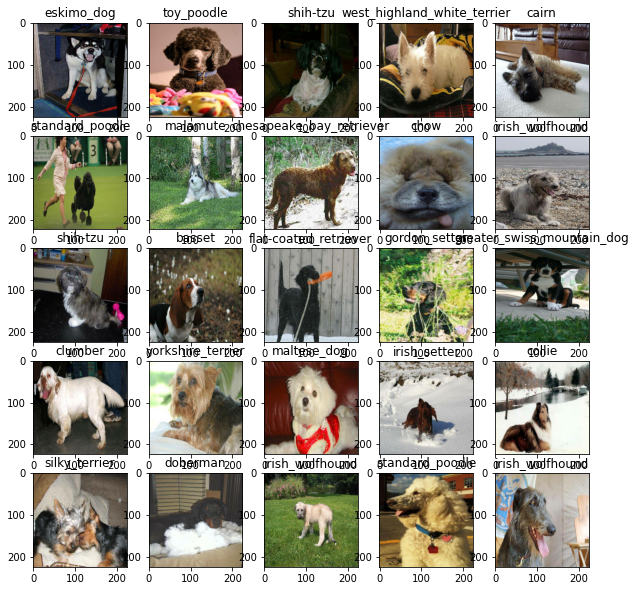

In [29]:
# visualizae data in training batch
show_25_images(train_images, train_labels)

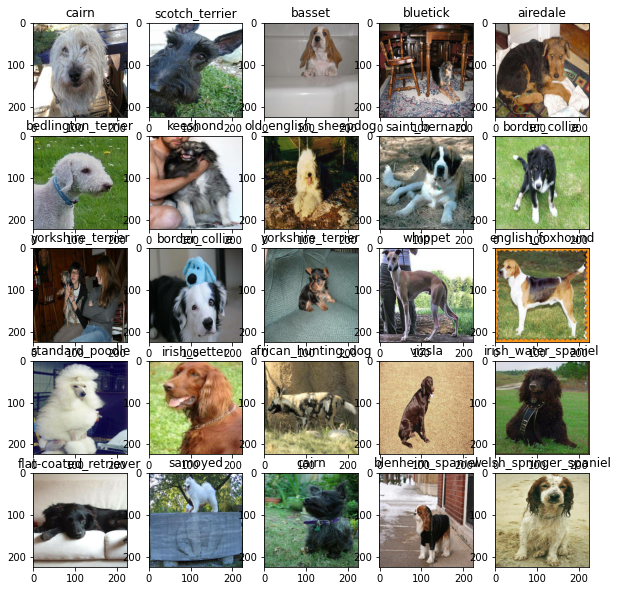

In [30]:
# Visualize validation set
val_images, val_labels = next(val_data.as_numpy_iterator())

show_25_images(val_images, val_labels)

# Creating a model

## Preparing inputs and outputs

Before building a model, there are few things that needs to be defined:
- The input shape (image shapes, in the form of tensors) for our model
- The output shape (image labels, in the form of tensors) for the model
- The URL of model that will be used from tensorflow hub (https://www.tensorflow.org/hub/)

In [ ]:
#Setup input shape to the model
INPUT_SHAPE = [NONE, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

#setup output shape
OUTPUT_SHAPE = len(unique_breeds)

#setup model url from tensorflow hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'